In [6]:
import keras
import tensorflow as tf
import gdal
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from keras_unet.models import custom_unet, satellite_unet
from keras_unet.metrics import iou, iou_thresholded
from keras_unet.losses import jaccard_distance
from keras_unet.utils import plot_segm_history



In [3]:
base_dir = Path(r'/media/studentuser/Seagate Portable Drive/training_test')
mask_dir = base_dir.joinpath('masks')
image_dir = base_dir.joinpath('images')
water_dir = mask_dir.joinpath('water')
shrubs_dir = mask_dir.joinpath('shrubs')
poly_dir = mask_dir.joinpath('polygonal')
trees_dir = mask_dir.joinpath('trees')

In [7]:
def make_path(img_dir, prefix, number):
    return os.path.join(img_dir, f"{prefix}_{number}.tif")

In [8]:
def img_number(fpath: str) -> int:
    return int(os.path.splitext(os.path.split(fpath)[1])[0].split('_')[-1])

In [9]:
def load_image(path: str) -> np.ndarray:
    ds = gdal.Open(path, gdal.GA_ReadOnly)
    return ds.GetRasterBand(1).ReadAsArray()

In [10]:
def load_stack(shape, dtype, img_dir, prefix):
    stack = np.zeros(shape = shape, dtype = dtype)
    for i in range(shape[0]):
        image_path = make_path(img_dir, prefix, i + 1)
        stack[i, :, :] = load_image(image_path)
    return stack

In [14]:
def load_stack_safely(shape, dtype, img_dir, prefix):
    stack = np.zeros(shape = shape, dtype = dtype)
    for i in range(shape[0]):
        image_path = make_path(img_dir, prefix, i + 1)
        if not os.path.isfile(image_path):
            print("skipping", image_path)
            continue
        stack[i, :, :] = load_image(image_path)
    return stack

In [11]:
I = 100
N = 256
M = 256
train_images = load_stack((I, N, M), np.float32, image_dir, "img")

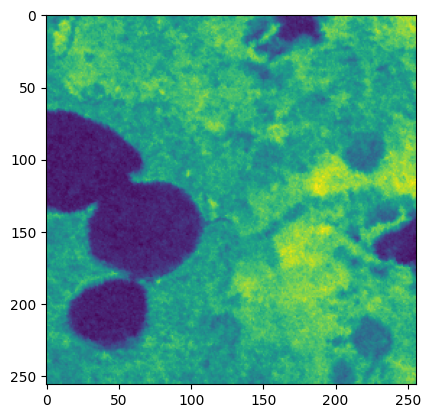

In [12]:
plt.imshow(train_images[2, :,:])

In [15]:
shrubs_mask = load_stack_safely((I, N, M), np.int8, shrubs_dir, "shrub")

skipping /media/studentuser/Seagate Portable Drive/training_test/masks/shrubs/shrub_1.tif
skipping /media/studentuser/Seagate Portable Drive/training_test/masks/shrubs/shrub_2.tif
skipping /media/studentuser/Seagate Portable Drive/training_test/masks/shrubs/shrub_3.tif
skipping /media/studentuser/Seagate Portable Drive/training_test/masks/shrubs/shrub_4.tif
skipping /media/studentuser/Seagate Portable Drive/training_test/masks/shrubs/shrub_5.tif
skipping /media/studentuser/Seagate Portable Drive/training_test/masks/shrubs/shrub_6.tif
skipping /media/studentuser/Seagate Portable Drive/training_test/masks/shrubs/shrub_7.tif
skipping /media/studentuser/Seagate Portable Drive/training_test/masks/shrubs/shrub_8.tif
skipping /media/studentuser/Seagate Portable Drive/training_test/masks/shrubs/shrub_9.tif
skipping /media/studentuser/Seagate Portable Drive/training_test/masks/shrubs/shrub_10.tif
skipping /media/studentuser/Seagate Portable Drive/training_test/masks/shrubs/shrub_11.tif
skipping